In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set_theme()

In [78]:
df_model = pd.read_csv('results_model.csv', index_col = 0)
df_agents = pd.read_csv('results_agents.csv', index_col = [0, 1])

In [79]:
number_of_agents = df_agents.loc[(1, slice(None)), :].shape[0]
number_of_periods = df_agents.loc[(slice(None), 1), :].shape[0]
print(f'We have a total of {number_of_agents} agents in the simulation, that ran for {number_of_periods-1} periods.')

# random_agent_1, random_agent_2, random_agent_3 = random.sample(range(0, number_of_agents), 3)
n_rand_agents = 3
random_agents = random.sample(range(0, number_of_agents), n_rand_agents)

sample_agents = []

for i in random_agents:
    sample_agents.append(df_agents.loc[(slice(None) , i) , :].reset_index(level = 1, drop = True))

# sample_agent_1 = df_agents.loc[(slice(None) , random_agent_1) , :].reset_index(level = 1, drop = True)
# sample_agent_2 = df_agents.loc[(slice(None) , random_agent_2) , :].reset_index(level = 1, drop = True)
# sample_agent_3 = df_agents.loc[(slice(None) , random_agent_3) , :].reset_index(level = 1, drop = True)

We have a total of 50 agents in the simulation, that ran for 1000 periods.


## Two random agents

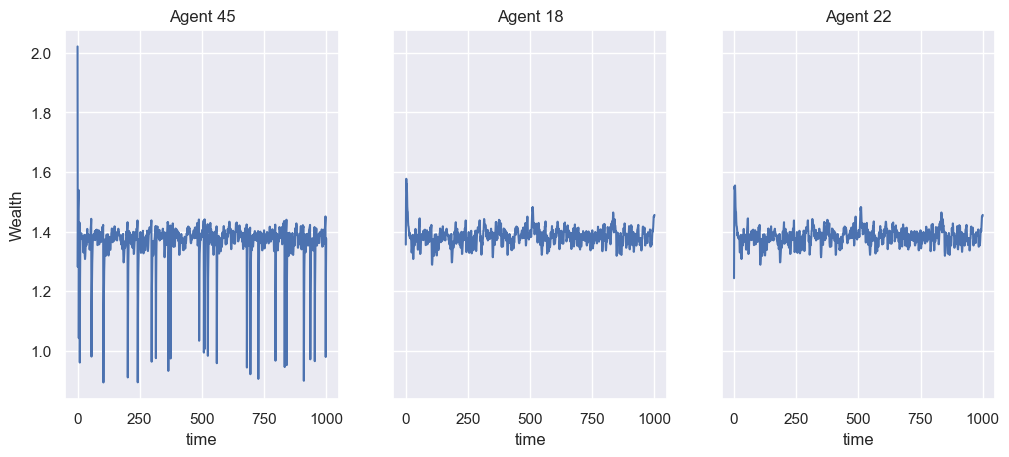

In [82]:
vars_to_plot = ['wealth', 'moral_behavior', 'connectivity', 'animal_spirits', 'consumption']

for v in vars_to_plot:

    fig, ax = plt.subplots(nrows=1, ncols=len(random_agents), sharey = True);
    fig.set(figwidth = 12)

    #ax[0].set_ylabel('Wealth');
    ax[0].set_ylabel(str.title(v));

    for i in range(n_rand_agents):
        ax[i].plot(sample_agents[i][v]);
        ax[i].set_xlabel('time');
        ax[i].set_title(f'Agent {random_agents[i]}');

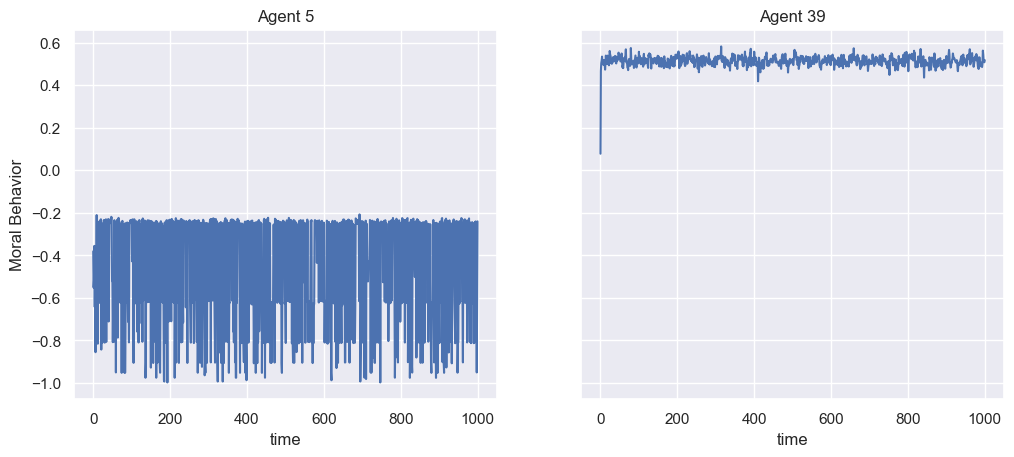

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey = True);
fig.set(figwidth = 12)
ax[0].plot(sample_agent_1.moral_behavior);
ax[1].plot(sample_agent_2.moral_behavior);
ax[2].plot(sample_agent_3.moral_behavior);
ax[0].set_ylabel('Moral Behavior');
ax[0].set_xlabel('time');
ax[1].set_xlabel('time');
ax[2].set_xlabel('time');
ax[0].set_title(f'Agent {random_agent_1}');
ax[1].set_title(f'Agent {random_agent_2}');
ax[2].set_title(f'Agent {random_agent_3}');

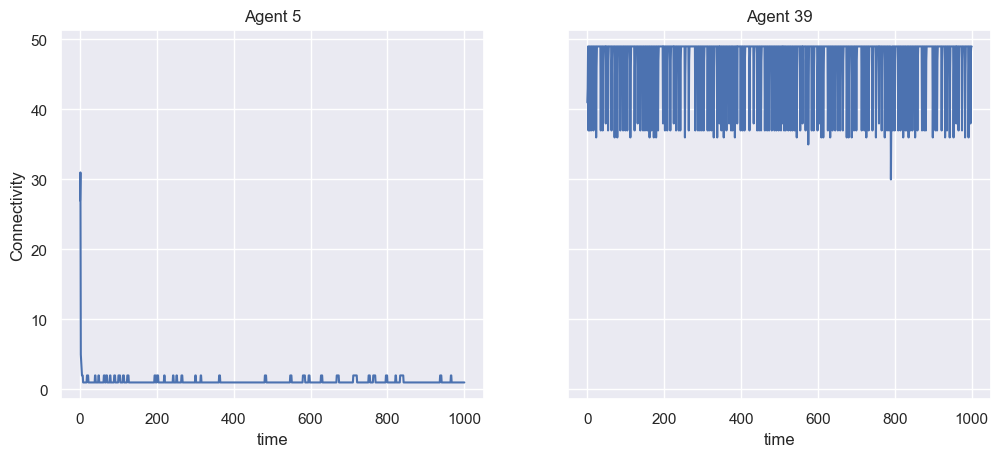

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey = True);
fig.set(figwidth = 12)
ax[0].plot(sample_agent_1.connectivity);
ax[1].plot(sample_agent_2.connectivity);
ax[2].plot(sample_agent_3.connectivity);
ax[0].set_ylabel('Connectivity');
ax[0].set_xlabel('time');
ax[1].set_xlabel('time');
ax[2].set_xlabel('time');
ax[0].set_title(f'Agent {random_agent_1}');
ax[1].set_title(f'Agent {random_agent_2}');
ax[2].set_title(f'Agent {random_agent_3}');

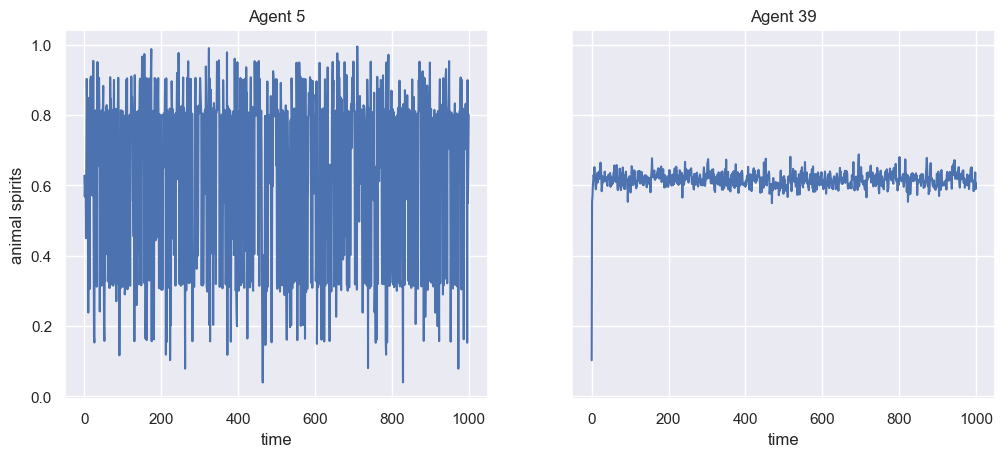

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey = True);
fig.set(figwidth = 12)
ax[0].plot(sample_agent_1.animal_spirits[:]);
ax[1].plot(sample_agent_2.animal_spirits[:]);
ax[2].plot(sample_agent_3.animal_spirits[:]);
ax[0].set_ylabel('animal spirits');
ax[0].set_xlabel('time');
ax[1].set_xlabel('time');
ax[2].set_xlabel('time');
ax[0].set_title(f'Agent {random_agent_1}');
ax[1].set_title(f'Agent {random_agent_2}');
ax[2].set_title(f'Agent {random_agent_3}');

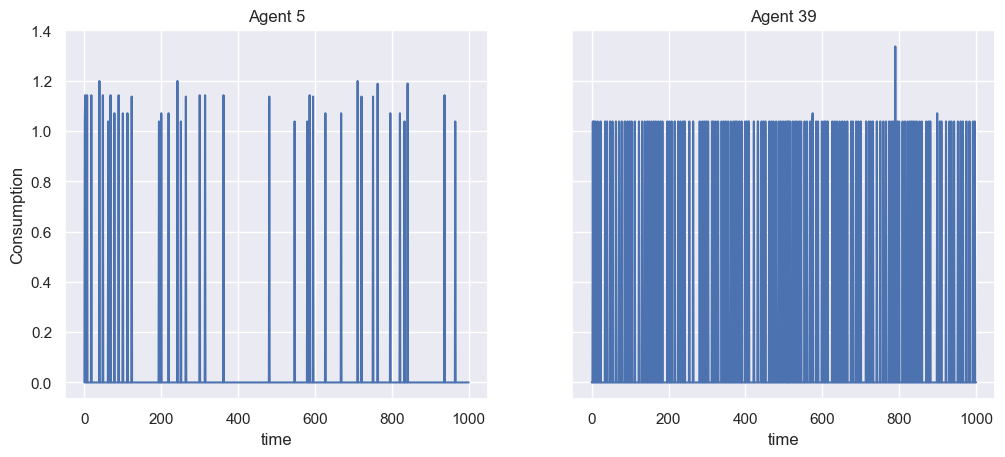

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True);
fig.set(figwidth = 12)
ax[0].plot(sample_agent_1.consumption[:]);
ax[1].plot(sample_agent_2.consumption[:]);
ax[0].set_ylabel('Consumption');
ax[0].set_xlabel('time');
ax[1].set_xlabel('time');
ax[0].set_title(f'Agent {random_agent_1}');
ax[1].set_title(f'Agent {random_agent_2}');
ax[2].set_title(f'Agent {random_agent_3}');

## Distributions

In [73]:
def create_partitions(arr, n):
  size = len(arr)

  if n >= size:
    return list(range(size))
  elif size == 1:
    return [0]
  else:
    return [int(np.floor(i*(size-1)/(n-1))) for i in range(n)]

def make_hist(col):
  global steps
  subsample_cross = create_partitions(range(df_model.shape[0]), 5)

  plt.figure(figsize=(15, 15 ))
  plt.subplots_adjust(hspace=0.2)
  #plt.suptitle(f"{col} at t={[i for i in subsample_cross]}", fontsize=16, y=0.95)
  plt.suptitle(f"{str.title(col)}", fontsize=16, y=0.95)

  ncols = 3
  nrows = 3

  axes = []

  for n, ticker in enumerate(subsample_cross):
      if n == 0:
        axes.append(plt.subplot(nrows, ncols, n + 1))
      else:
        axes.append(plt.subplot(nrows, ncols, n + 1, sharey = axes[0]))#, sharex = axes[0]))
      axes[n].set_title(f't = {n}')
        
      df_agents.loc[(ticker, slice(None)), col].hist(ax = axes[n], bins = 10)

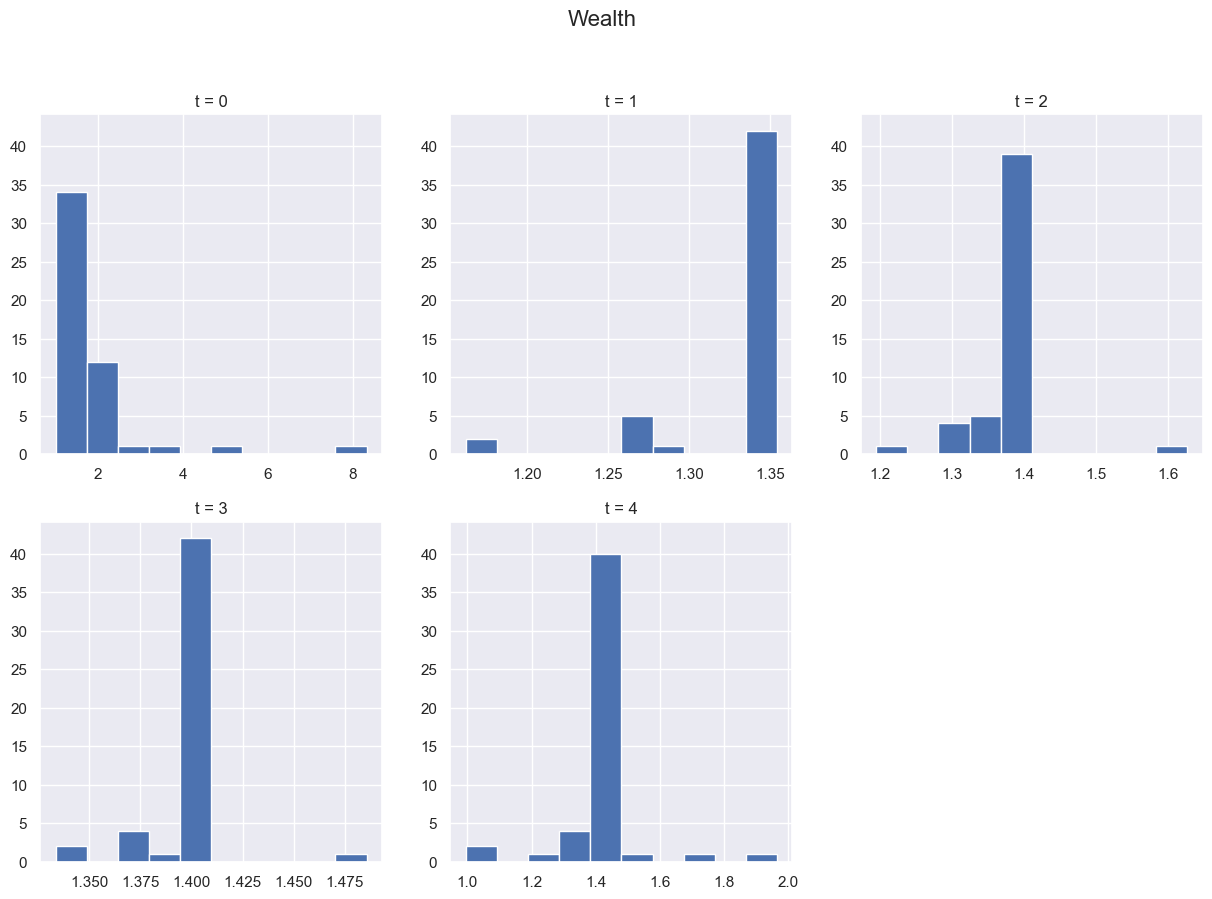

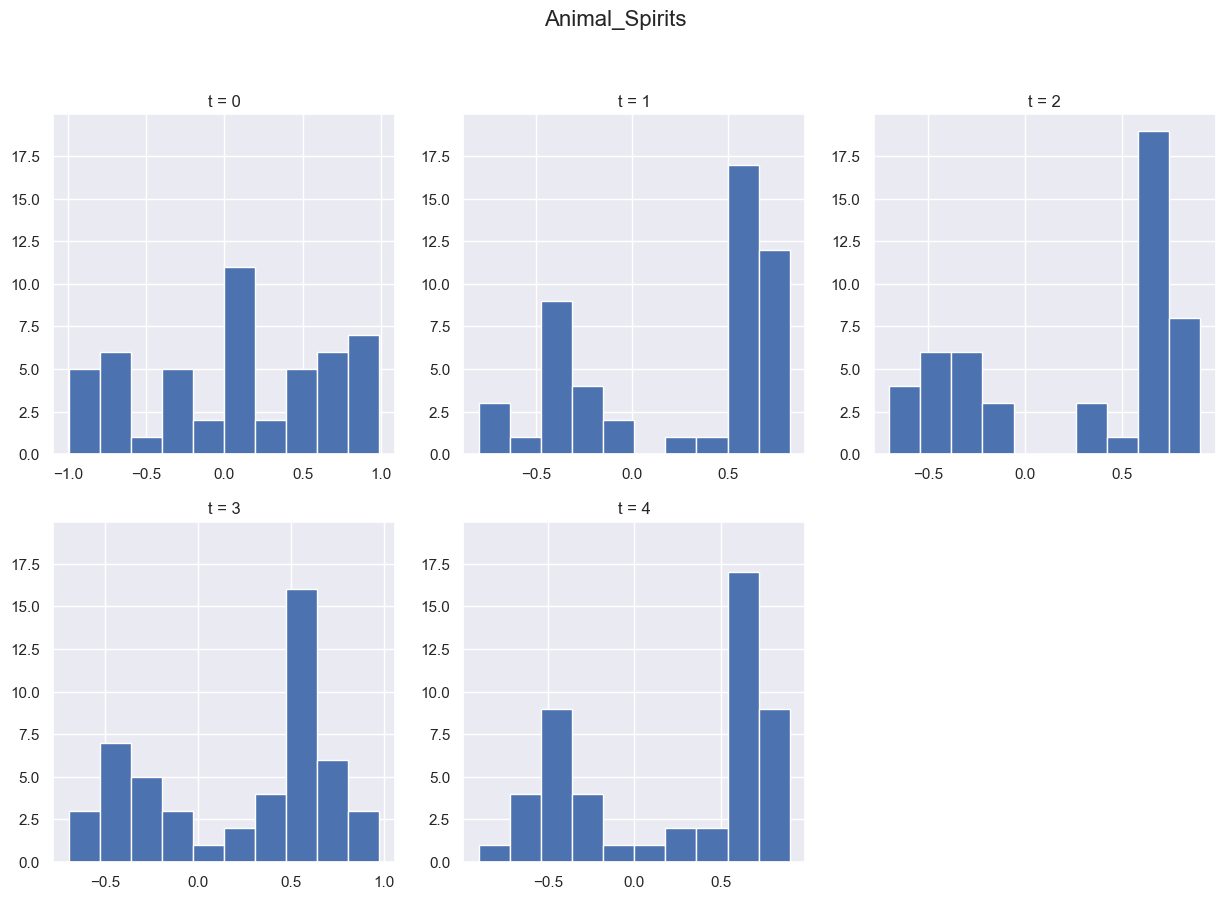

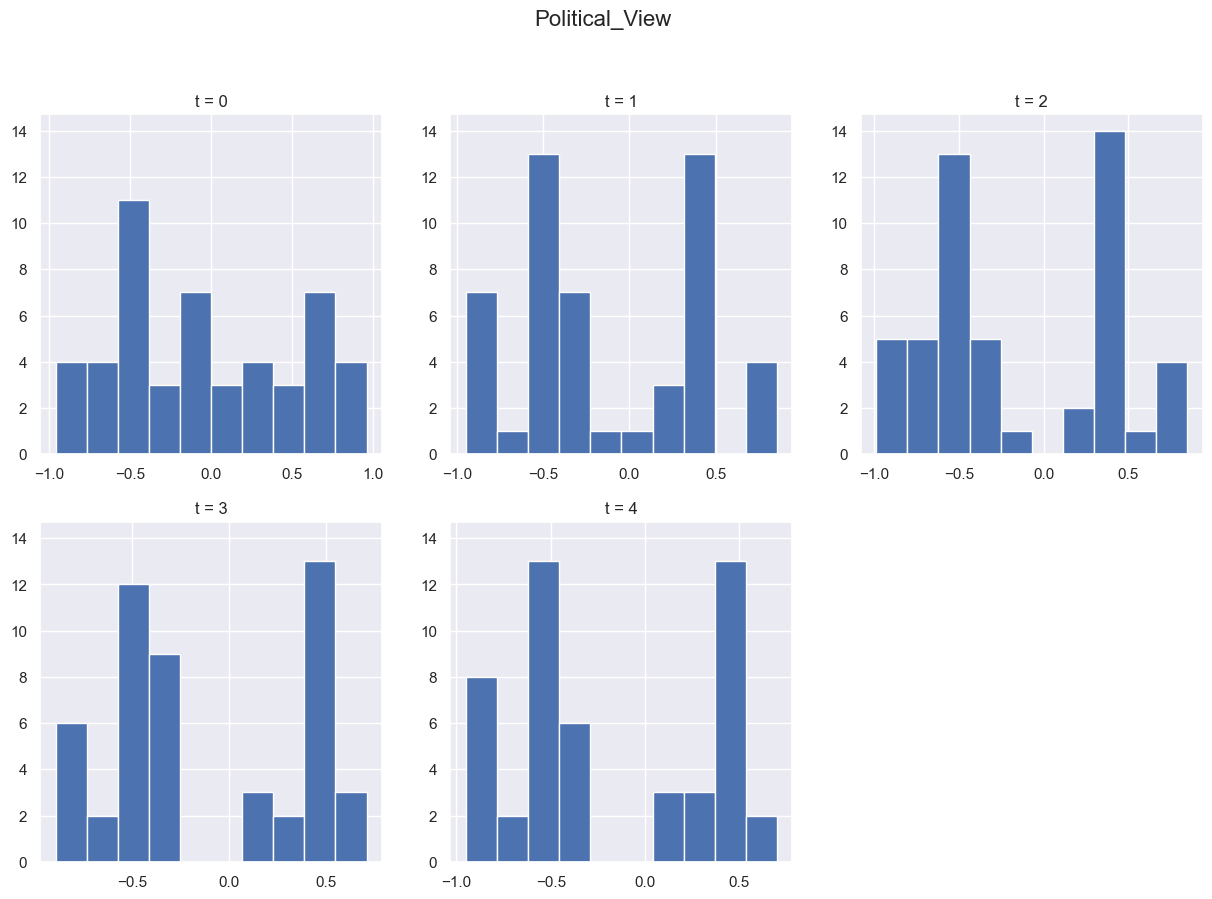

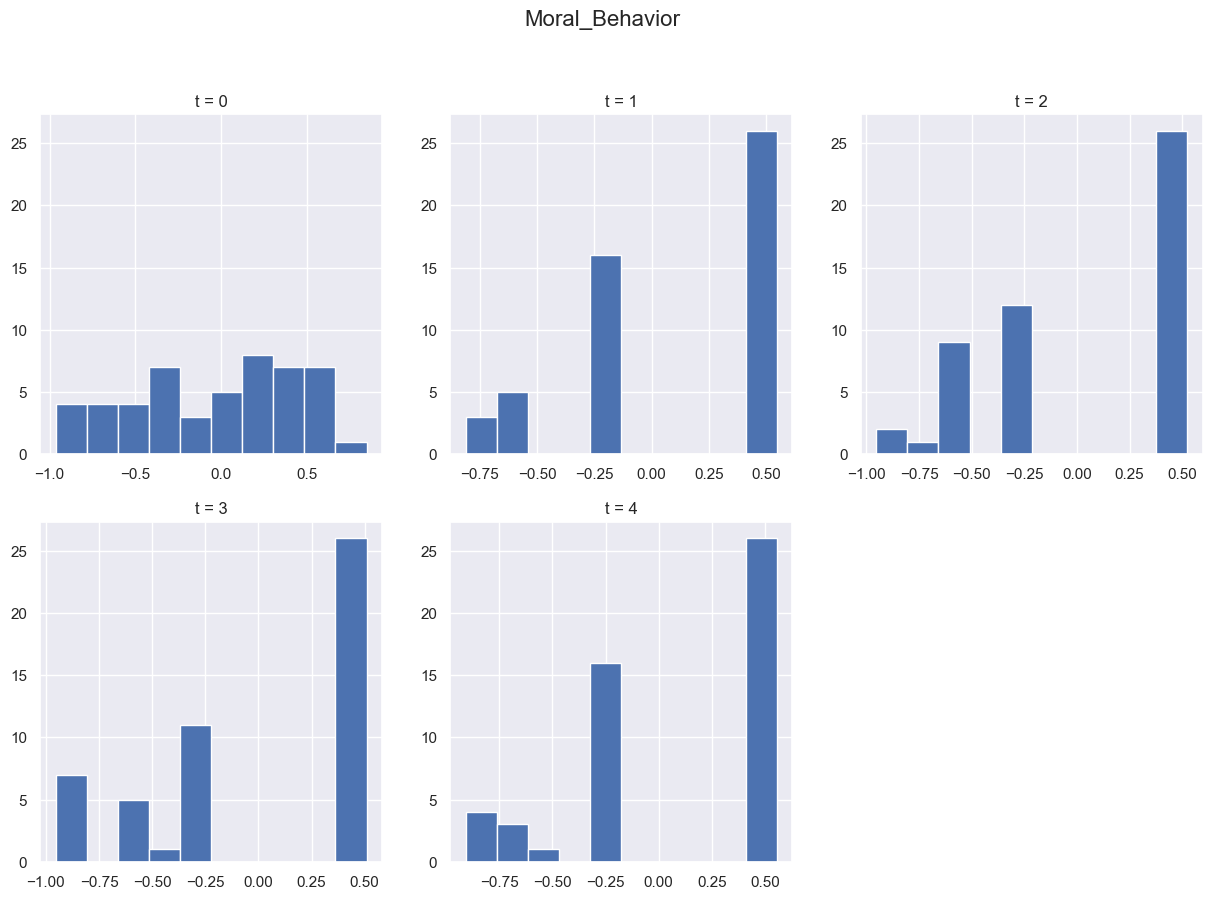

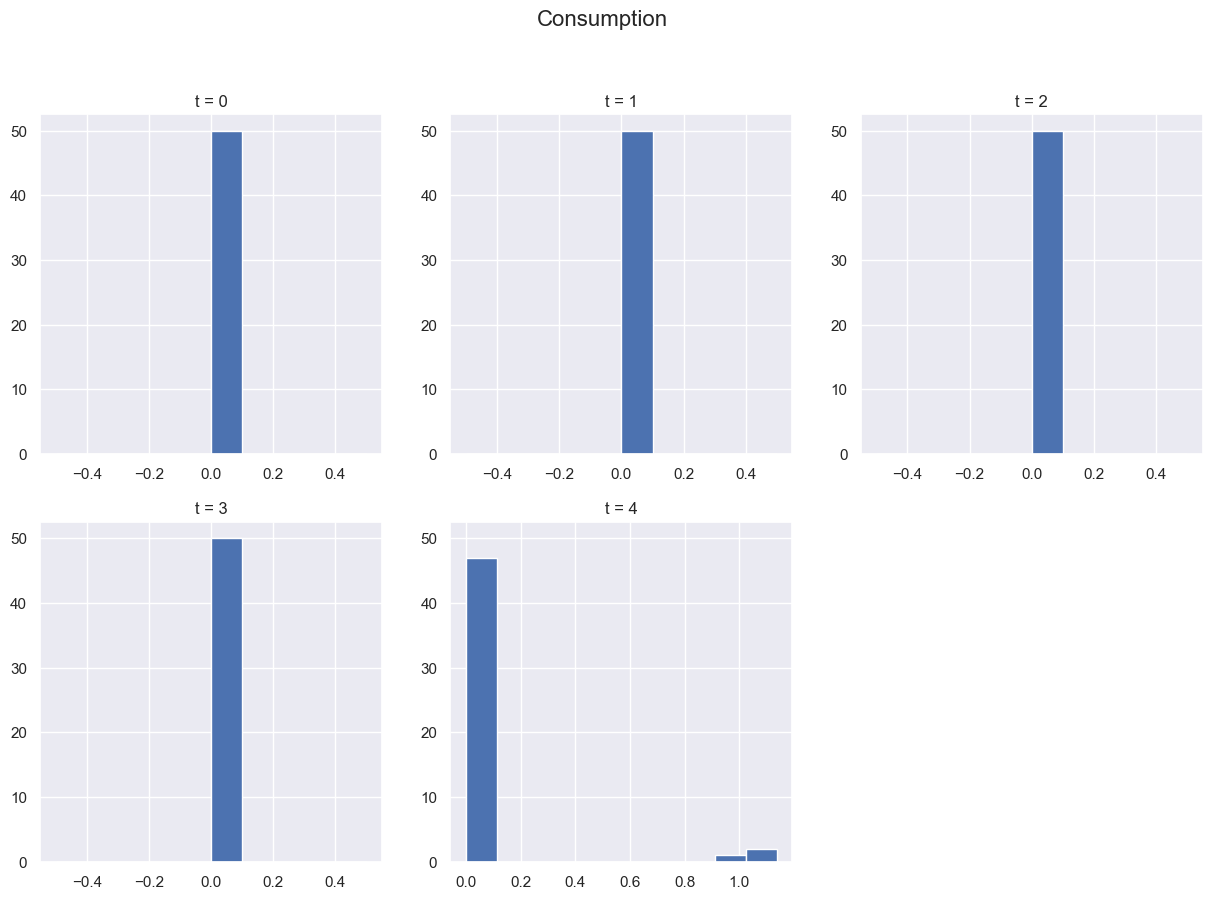

In [74]:
cols = ['wealth', 'animal_spirits', 'political_view', 'moral_behavior', 'consumption']
for c in cols:
  make_hist(c)

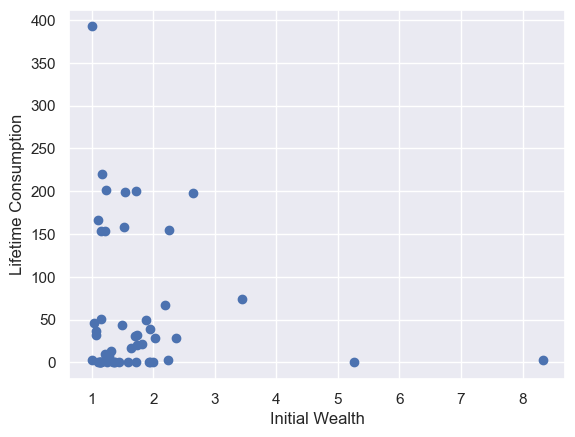

In [59]:
agents_lifetime_consumption = df_agents['consumption'].unstack().sum()
agents_initial_wealth = df_agents['wealth'].unstack().iloc[0,:]

plt.scatter(y = agents_lifetime_consumption, x = agents_initial_wealth);
plt.xlabel('Initial Wealth');
plt.ylabel('Lifetime Consumption');

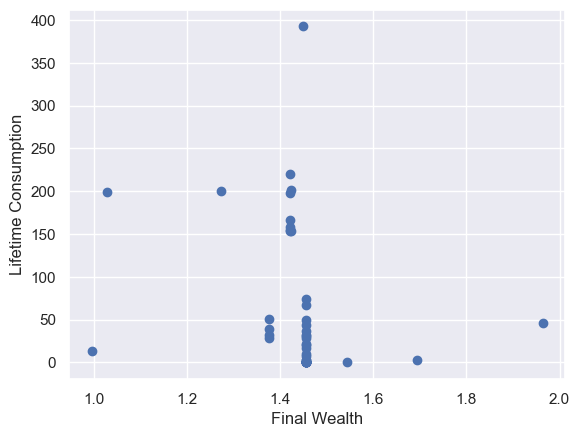

In [60]:
agents_final_wealth = df_agents['wealth'].unstack().iloc[df_model.shape[0] - 1,:]

plt.scatter(y = agents_lifetime_consumption, x = agents_final_wealth);
plt.xlabel('Final Wealth');
plt.ylabel('Lifetime Consumption');

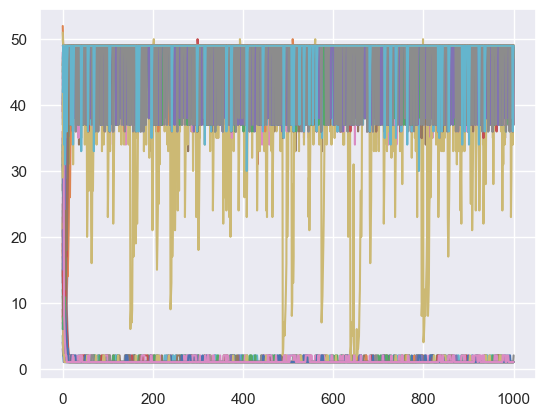

In [61]:
plt.plot(df_agents['connectivity'].unstack());

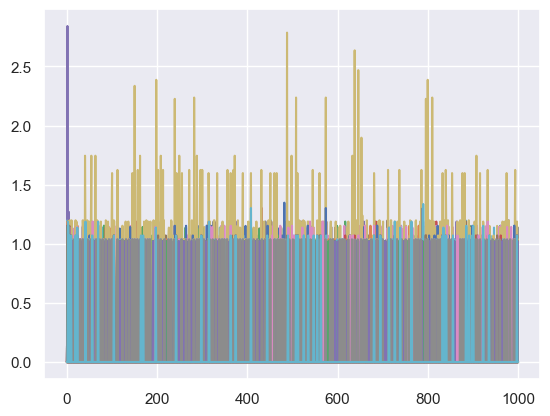

In [62]:
plt.plot(df_agents['consumption'].unstack());

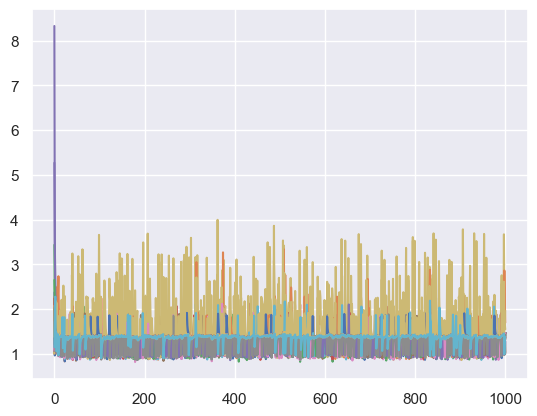

In [63]:
plt.plot(df_agents['wealth'].unstack());

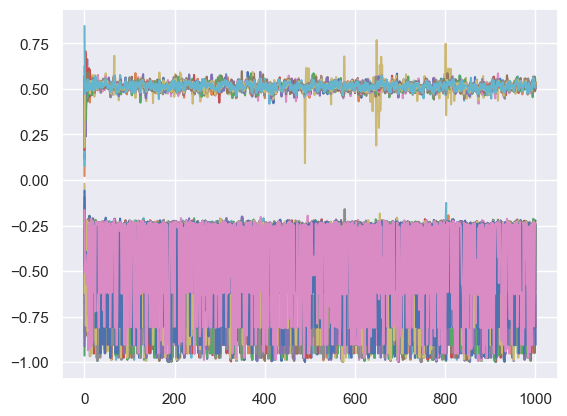

In [64]:
plt.plot(df_agents['moral_behavior'].unstack());

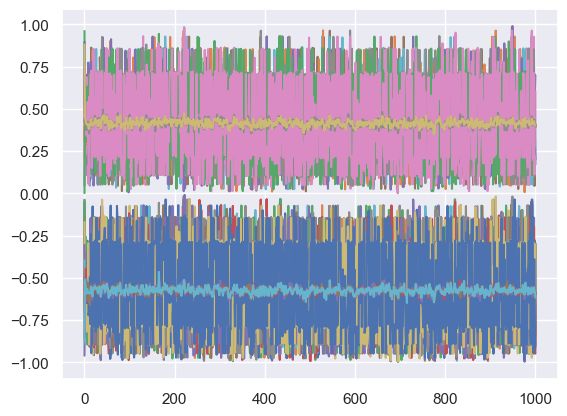

In [65]:
plt.plot(df_agents['political_view'].unstack());